<a href="https://colab.research.google.com/github/koojaekwan/Kaggle_study/blob/master/pandas_exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas trick with Titanic data
I refer that Kaggle :
https://www.kaggle.com/python10pm/pandas-100-tricks#Welcome-to-this-Kernel  
* If you fail to load this file in github, please try it!  
https://github.com/iurisegtovich/PyTherm-applied-thermodynamics/issues/11  
https://nbviewer.jupyter.org/  

In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
os.chdir('/content/MyDrive/MyDrive')  # setwd like R
os.getcwd()   # current working directory

'/content/MyDrive/MyDrive'

In [3]:
# this will allow us to print all the files as we generate more in the kernel
def print_files():
    for dirname, _, filenames in os.walk('/content/MyDrive/MyDrive'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# check Trick 91 for an example
def generate_sample_data(): # creates a fake df for testing
    number_or_rows = 20
    num_cols = 7
    cols = list("ABCDEFG")
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeIntIndex(number_or_rows)
    return df

# check Trick 91 for an example
def generate_sample_data_datetime(): # creates a fake df for testing
    number_or_rows = 365*24
    num_cols = 2
    cols = ["sales", "customers"]
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeDateIndex(number_or_rows, freq="H")
    return df

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print_files()

/content/MyDrive/MyDrive/train.csv
/content/MyDrive/MyDrive/test.csv
/content/MyDrive/MyDrive/머신러닝 도감(제이펍).gdoc
/content/MyDrive/MyDrive/srr-mave-gqc - 2020년 10월 11일.gjam
/content/MyDrive/MyDrive/trick99data.csv
/content/MyDrive/MyDrive/trick83data.csv
/content/MyDrive/MyDrive/trick78data1.csv
/content/MyDrive/MyDrive/trick78data3.csv
/content/MyDrive/MyDrive/trick78data2.csv
/content/MyDrive/MyDrive/trick58data.csv
/content/MyDrive/MyDrive/coding_test/group_call_HMS.csv
/content/MyDrive/MyDrive/coding_test/first.pickle
/content/MyDrive/MyDrive/coding_test/first2.pickle
/content/MyDrive/MyDrive/coding_test/first3.pickle
/content/MyDrive/MyDrive/coding_test/first4.pickle
/content/MyDrive/MyDrive/coding_test/first5.pickle
/content/MyDrive/MyDrive/coding_test/p_data.pickle
/content/MyDrive/MyDrive/coding_test/final_dat.pickle
/content/MyDrive/MyDrive/Colab Notebooks/jaekwankoo.ipynb
/content/MyDrive/MyDrive/Colab Notebooks/chap1.ipynb
/content/MyDrive/MyDrive/Colab Note

## Trick 55 :filtering a df with multiple criteria using reduce  

https://stackoverflow.com/questions/21738882/fast-pandas-filtering

In [4]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
print("Classical filter hard to read and mantain.")

df[(df["Sex"] == "male") & 
   (df["Fare"] > 15) & 
   (df["Embarked"] == "C") & 
   (df["Age"] < 60)].head(10)

Classical filter hard to read and mantain.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


In [23]:
print("Solution saving criteria as objects")

cr1 = df["Sex"] == "male"
cr2 = df["Fare"] > 15
cr3 = df["Embarked"] == "C"
cr4 = df["Age"] < 60

df[cr1 & cr2 & cr3 & cr4].head(10)

Solution saving criteria as objects


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


In [24]:
print("Solution using reduce")
from functools import reduce

# creates our criteria usings lambda
# lambda takes 2 parameters, x and y
# 'reduce' combines them & for every cr in the (cr1, cr2, cr3, cr4)

criteria = reduce(lambda x, y: x & y, (cr1, cr2, cr3, cr4)); df[criteria].head(10)

Solution using reduce


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


In [12]:
criteria

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [28]:
crit = ['male']

%timeit df.loc[np.in1d(df['Sex'], crit),]

1000 loops, best of 3: 432 µs per loop


In [27]:
%timeit df.loc[df['Sex'].isin(crit),]

1000 loops, best of 3: 549 µs per loop


## Trick 54 : Calculate the difference between each row and the previous (diff())

In [29]:
df = generate_sample_data()

df.head()

/usr/local/lib/python3.6/dist-packages/pandas/util/__init__.py:23: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,A,B,C,D,E,F,G
0,13,12,10,4,18,17,13
1,18,19,6,13,15,15,3
2,10,13,2,11,7,1,17
3,19,8,11,6,6,14,11
4,6,18,17,6,15,15,2


In [30]:
df["A_diff"] = df["A"].diff() # calculate the difference between 2 rows
df["A_diff_pct"] = df["A"].pct_change()*100 # calculates the percentual variation between 2 rows

df # 첫 줄은 뺄 상대가 없으므로 NaN 반환

,A,B,C,D,E,F,G,A_diff,A_diff_pct
0,13,12,10,4,18,17,13,NaN,NaN
1,18,19,6,13,15,15,3,5.0,38.461538
2,10,13,2,11,7,1,17,-8.0,-44.444444
3,19,8,11,6,6,14,11,9.0,90.000000
4,6,18,17,6,15,15,2,-13.0,-68.421053
5,15,16,7,13,7,8,11,9.0,150.000000
6,18,4,1,5,11,3,9,3.0,20.000000
7,8,16,10,13,1,2,12,-10.0,-55.555556
8,4,12,1,14,1,7,4,-4.0,-50.000000
9,12,5,11,8,8,11,2,8.0,200.000000


In [31]:
# add some style
df.style.format({"A_diff_pct":'{:.2f}%'})

,A,B,C,D,E,F,G,A_diff,A_diff_pct
0,13,12,10,4,18,17,13,nan,nan%
1,18,19,6,13,15,15,3,5.000000,38.46%
2,10,13,2,11,7,1,17,-8.000000,-44.44%
3,19,8,11,6,6,14,11,9.000000,90.00%
4,6,18,17,6,15,15,2,-13.000000,-68.42%
5,15,16,7,13,7,8,11,9.000000,150.00%
6,18,4,1,5,11,3,9,3.000000,20.00%
7,8,16,10,13,1,2,12,-10.000000,-55.56%
8,4,12,1,14,1,7,4,-4.000000,-50.00%
9,12,5,11,8,8,11,2,8.000000,200.00%


## Trick 53 : Shuffle rows of a df (df.sample())

In [32]:
df = generate_sample_data()

df.sample(frac = 0.5, random_state = 2) # random seed
df.sample(frac = 0.5, random_state = 2).reset_index(drop = True) # reset index after shuffeling

,A,B,C,D,E,F,G
12,12,6,11,8,13,2,14
4,5,17,14,14,12,13,15
18,10,2,3,10,16,8,6
0,11,15,13,17,2,3,17
9,6,1,6,19,3,6,16
5,10,16,8,11,12,14,5
3,7,8,9,7,19,18,16
10,5,7,12,2,5,2,14
1,4,4,8,3,9,16,15
17,14,5,10,2,7,7,18


,A,B,C,D,E,F,G
0,12,6,11,8,13,2,14
1,5,17,14,14,12,13,15
2,10,2,3,10,16,8,6
3,11,15,13,17,2,3,17
4,6,1,6,19,3,6,16
5,10,16,8,11,12,14,5
6,7,8,9,7,19,18,16
7,5,7,12,2,5,2,14
8,4,4,8,3,9,16,15
9,14,5,10,2,7,7,18


## Trick 52 : Making plots with pandas

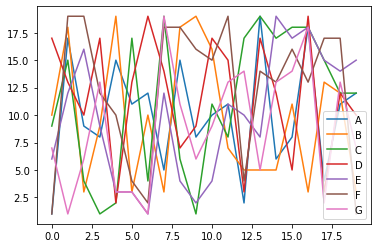

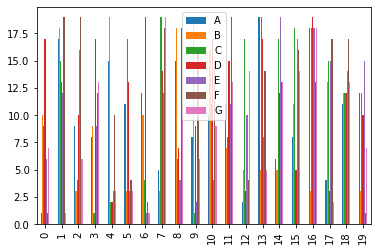

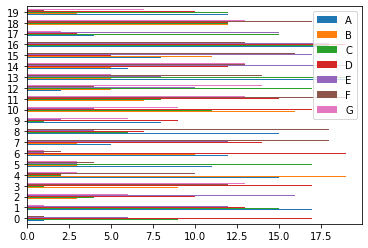

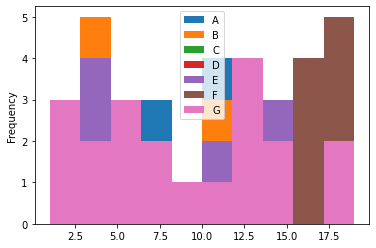

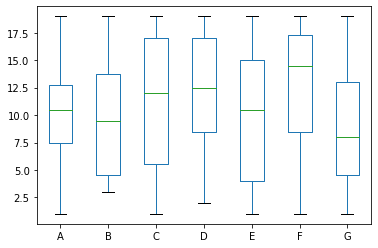

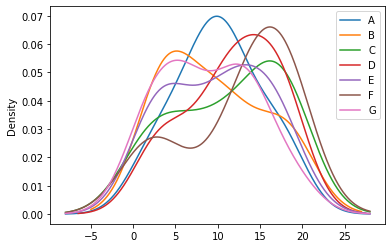

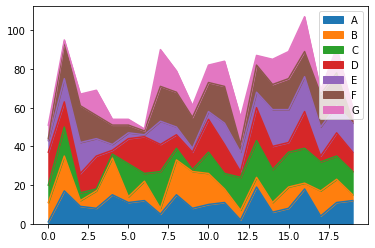

In [33]:
df = generate_sample_data()

df.plot(kind = "line")
df.plot(kind = "bar")
df.plot(kind = "barh")
df.plot(kind = "hist")
df.plot(kind = "box")
df.plot(kind = "kde")
df.plot(kind = "area")

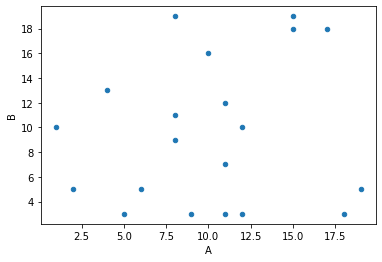

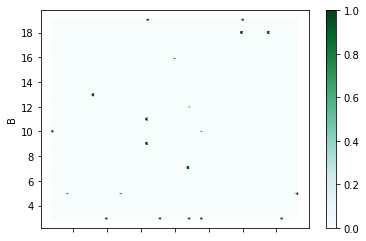

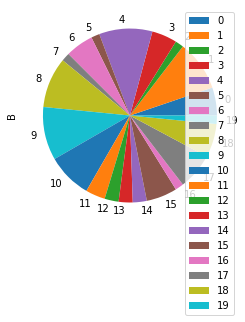

In [34]:
# the following plots requiere x and y
df.plot(x = "A", y = "B", kind = "scatter")
df.plot(x = "A", y = "B", kind = "hexbin")
df.plot(x = "A", y = "B", kind = "pie") # here you can pass only x but you need to add subplots = True

# other plots are available through pd.plotting
# more about plotting https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## Trick 51 : Concatenate 2 column strings

In [35]:
print_files()

/content/MyDrive/MyDrive/train.csv
/content/MyDrive/MyDrive/test.csv
/content/MyDrive/MyDrive/머신러닝 도감(제이펍).gdoc
/content/MyDrive/MyDrive/srr-mave-gqc - 2020년 10월 11일.gjam
/content/MyDrive/MyDrive/trick99data.csv
/content/MyDrive/MyDrive/trick83data.csv
/content/MyDrive/MyDrive/trick78data1.csv
/content/MyDrive/MyDrive/trick78data3.csv
/content/MyDrive/MyDrive/trick78data2.csv
/content/MyDrive/MyDrive/trick58data.csv
/content/MyDrive/MyDrive/coding_test/group_call_HMS.csv
/content/MyDrive/MyDrive/coding_test/first.pickle
/content/MyDrive/MyDrive/coding_test/first2.pickle
/content/MyDrive/MyDrive/coding_test/first3.pickle
/content/MyDrive/MyDrive/coding_test/first4.pickle
/content/MyDrive/MyDrive/coding_test/first5.pickle
/content/MyDrive/MyDrive/coding_test/p_data.pickle
/content/MyDrive/MyDrive/coding_test/final_dat.pickle
/content/MyDrive/MyDrive/Colab Notebooks/jaekwankoo.ipynb
/content/MyDrive/MyDrive/Colab Notebooks/chap1.ipynb
/content/MyDrive/MyDrive/Colab Note

In [36]:
df = pd.read_csv('train.csv')

# Solution 1 : using str.cat
df['Name'].str.cat(df['Sex'], sep = ", ").head()

0                        Braund, Mr. Owen Harris, male
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                       Heikkinen, Miss. Laina, female
3    Futrelle, Mrs. Jacques Heath (Lily May Peel), ...
4                       Allen, Mr. William Henry, male
Name: Name, dtype: object

In [39]:
# using + sign
(df["Name"] + ", " + df["Sex"]).head()

0                        Braund, Mr. Owen Harris, male
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                       Heikkinen, Miss. Laina, female
3    Futrelle, Mrs. Jacques Heath (Lily May Peel), ...
4                       Allen, Mr. William Henry, male
dtype: object

## Trick 50 : Named aggregation with multiple columns passing tupples (new in pandas 0.25)

In [40]:
df = pd.read_csv('train.csv')

In [41]:
# Typical groupby
print("Problem : MultiIndex")
df.groupby("Pclass").agg({"Age":["mean", "max"], "Survived": "mean"})

Problem : MultiIndex


Age        Survived
             mean   max      mean
Pclass                           
1       38.233441  80.0  0.629630
2       29.877630  70.0  0.472826
3       25.140620  74.0  0.242363

In [42]:
# Please note that this has been covered in 86 and 86 bis.
# This is just one more way to do it.
print("Named aggregation")
df.groupby("Pclass").agg(avg_age = ("Age", "mean"),
                        max_age = ("Age", "max"), 
                        survival_rate = ("Survived", "mean"))

Named aggregation


,avg_age,max_age,survival_rate
Pclass,,,
1,38.233441,80.0,0.629630
2,29.877630,70.0,0.472826
3,25.140620,74.0,0.242363


## Trick 49 : Sampling with pandas (with replacement and weights)

In [43]:
d = {"A": [100, 200, 300, 400, 100], "W":[10, 5, 0, 3, 8]}
df = pd.DataFrame(d)

df

,A,W
0,100,10
1,200,5
2,300,0
3,400,3
4,100,8


In [44]:
# with replacement
df.sample(n = 5, replace = True, random_state = 2)

,A,W
0,100,10
0,100,10
3,400,3
2,300,0
3,400,3


In [51]:
# adding weights
df.sample(n = 5, replace = True, random_state = 2, weights = "W")

,A,W
1,200,5
0,100,10
1,200,5
1,200,5
1,200,5


## Trick 48 : Useful parameters when using pd.read_csv()

In [52]:
df = pd.read_csv("train.csv")

df.head()
df.dtypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
# Let's import the country and beer_servings columns, convert them to string and float64 respectevly
# Import only the first 5 rows and thread 0 as nans
df = pd.read_csv("train.csv",
                    usecols=["Sex", "Age"],
                    dtype={"Sex":"category", "Age":"int64"},
                    nrows = 5,
                    na_values = 0.0)
df
df.dtypes

# more about read_csv on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

,Sex,Age
0,male,22
1,female,38
2,female,26
3,female,35
4,male,35


Sex    category
Age       int64
dtype: object

## Trick 47 : Create one row for each item in a list (explode)

In [56]:
d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":[["Ter Stegen", "Semedo", "Piqué", "Lenglet", "Alba", "Rakitic", "De Jong", "Sergi Roberto", "Messi", "Suárez", "Griezmann"], \
               ["Courtois", "Carvajal", "Varane", "Sergio Ramos", "Mendy", "Kroos", "Valverde", "Casemiro", "Isco", "Benzema", "Bale"]]}

print("Notice that we have a list of players for each team. Let's generate a row for each player.")
df = pd.DataFrame(d)
df

Notice that we have a list of players for each team. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


In [57]:
print("Using explode to generate new rows for each player.")
df1 = df.explode("Players")
df1

Using explode to generate new rows for each player.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


In [58]:
print("Reverse this operation with groupby and agg")
df["Imploded"] = df1.groupby(df1.index)["Players"].agg(list)
df

Reverse this operation with groupby and agg


,Team,Players,Imploded
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak...","[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men...","[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


## Trick 46 : Store NaN in an integer type with Int64 (not int64)

In [59]:
print("Default series")

ser1 = pd.Series([10, 20])
ser1

Default series


0    10
1    20
dtype: int64

In [60]:
print("Let's add a NaN to an int64 series")

ser1 = pd.Series([10, 20, np.nan])  # Notice it has been converted to float64
ser1 

Let's add a NaN to an int64 series


0    10.0
1    20.0
2     NaN
dtype: float64

In [61]:
print("But if we use Int64 than everything will work")

ser1 = pd.Series([10, 20, np.nan], dtype = "Int64") # dtype is Int64
ser1

But if we use Int64 than everything will work


0      10
1      20
2    <NA>
dtype: Int64

## Trick 45 : Create rows for values separated by commas in a cell (assing and explode)

In [62]:
d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":["Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rakitic, De Jong, Sergi Roberto, Messi, Suárez, Griezmann",
               "Courtois, Carvajal, Varane, Sergio Ramos, Mendy, Kroos, Valverde, Casemiro, Isco, Benzema, Bale"]}


print("Notice that we have a list of players for each team separated by commas. Let's generate a row for each player.")

df = pd.DataFrame(d)
df

Notice that we have a list of players for each team separated by commas. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"Ter Stegen, Semedo, Piqué, Lenglet, Alba, Raki..."
1,FC Real Madrid,"Courtois, Carvajal, Varane, Sergio Ramos, Mend..."


In [63]:
print("Notice that we have converted to something similar seen in example 47.")

df.assign(Players = df["Players"].str.split(","))

Notice that we have converted to something similar seen in example 47.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba,..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, ..."


In [64]:
print("Now add explode and done.")

df.assign(Players = df["Players"].str.split(",")).explode("Players")

Now add explode and done.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


## Trick 44 : Use a local variable within a  query in pandas (using @)

In [65]:
df = generate_sample_data()

df

,A,B,C,D,E,F,G
0,9,14,19,6,11,18,7
1,4,2,9,3,13,7,12
2,7,6,3,4,7,10,3
3,2,17,19,13,14,10,7
4,18,5,11,12,3,18,10
5,13,5,16,19,7,11,5
6,8,4,16,14,13,10,10
7,14,15,18,7,17,9,14
8,16,15,7,18,3,11,18
9,11,14,5,12,18,19,19


In [66]:
# create a local variable mean
mean = df["A"].mean()

mean

10.95

In [68]:
# now let's use in inside a query of pandas using @
df.query("A > @mean") # mean is local variable

,A,B,C,D,E,F,G
4,18,5,11,12,3,18,10
5,13,5,16,19,7,11,5
7,14,15,18,7,17,9,14
8,16,15,7,18,3,11,18
9,11,14,5,12,18,19,19
10,15,14,13,10,7,14,16
11,12,9,12,5,2,17,11
12,16,12,12,5,17,6,3
13,19,11,6,9,3,13,19
14,14,7,15,8,13,12,4


## Trick 43 : Create one row for each item in a list (explode) !!!duplicated Trick 47!!!

In [69]:
# It seems that this trick is duplicated, skip to the next one
# I decided to keep in, so in the future there will be no confusion if you consult the original material
# and this kernel

d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":[["Ter Stegen", "Semedo", "Piqué", "Lenglet", "Alba", "Rakitic", "De Jong", "Sergi Roberto", "Messi", "Suárez", "Griezmann"], \
               ["Courtois", "Carvajal", "Varane", "Sergio Ramos", "Mendy", "Kroos", "Valverde", "Casemiro", "Isco", "Benzema", "Bale"]]}

print("Notice that we have a list of players for each team. Let's generate a row for each player.")
df = pd.DataFrame(d)
df

Notice that we have a list of players for each team. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


In [70]:
print("Using explode to generate new rows for each player.")
df1 = df.explode("Players")
df1

Using explode to generate new rows for each player.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


In [71]:
print("Reverse this operation with groupby and agg")
df["Imploded"] = df1.groupby(df1.index)["Players"].agg(list)
df

Reverse this operation with groupby and agg


,Team,Players,Imploded
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak...","[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men...","[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


## Trick 42 : New aggregation function -> last()

In [72]:
d = {"patient":[1, 2, 3, 1, 1, 2], "visit":[2015, 2016, 2014, 2016, 2017, 2020]}
df = pd.DataFrame(d)
df.sort_values("visit")

,patient,visit
2,3,2014
0,1,2015
1,2,2016
3,1,2016
4,1,2017
5,2,2020


In [75]:
df.groupby("patient")["visit"].last()

patient
1    2017
2    2020
3    2014
Name: visit, dtype: int64

In [74]:
print("Let's get the last visit for each patient")

df.groupby("patient")["visit"].last().to_frame() # 사람별 마지막으로 방문한 년도

Let's get the last visit for each patient


,visit
patient,
1,2017
2,2020
3,2014


## Trick 41 : Ordered categories (from pandas.api.types import CategoricalDtype)  

범주에 순서를 부여

In [76]:
import pandas as pd
from pandas.api.types import CategoricalDtype

d = {"ID":[100, 101, 102, 103], "quality":["bad", "very good", "good", "excellent"]}
df = pd.DataFrame(d)
df

,ID,quality
0,100,bad
1,101,very good
2,102,good
3,103,excellent


In [79]:
print("Let's create our own categorical order.")

cat_type = CategoricalDtype(["bad", "good", "very good", "excellent"], ordered = True)
df["quality"] = df["quality"].astype(cat_type)

cat_type
df

Let's create our own categorical order.


CategoricalDtype(categories=['bad', 'good', 'very good', 'excellent'], ordered=True)

,ID,quality
0,100,bad
1,101,very good
2,102,good
3,103,excellent


In [80]:
print("Now we can use logical sorting.")
df = df.sort_values("quality", ascending = True)
df

Now we can use logical sorting.


,ID,quality
0,100,bad
2,102,good
1,101,very good
3,103,excellent


In [81]:
print("We can also filter this as if they are numbers. AMAZING.")
df[df["quality"] > "bad"]

We can also filter this as if they are numbers. AMAZING.


,ID,quality
2,102,good
1,101,very good
3,103,excellent
